## Setting up necessary things

In [1]:
!nvidia-smi

Wed Aug 30 17:05:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
! pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ohmeow-blurr 1.0.5 require

In [5]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
%cd /content/drive/My Drive/MasterCourse_Project/Game_classifier

/content/drive/My Drive/MasterCourse_Project/Game_classifier


## Data

In [8]:
df=pd.read_csv("game_new_dataset_cleaned.csv")
df.head()

,title,description,genres
0,Giganten,"Giganten could be briefly described as ""Dinosaur Stratego."" Each player has a set of 23 saurians (dinosaurs of various kinds, pterodactyls, pleisosaurs, etc.) which are stand-up cardboard pieces with plain backs, so the opponent cannot tell which piece is which. Pieces move and attack each other Stratego-fashion, with the goal being to find your opponent's eggs.There were two versions of the game produced. The original 1981 version came in a small box, with a larger box coming out in 1982, and had numbers on the pieces to indicate their strength on land and in water (air being a special ca...","['Abstract Strategy', 'Animals', 'Prehistoric']"
1,Rommel at the Meuse,"(from Simulations Workshop website:)The German offensive against France was decided by the swift advance of the Panzer columns through the Ardennes forest and a quick crossing of the Meuse River. One of the leading divisions was the 7th Panzer lead by Erwin Rommel.One 11 by 16 inch color map, 186 color counters, rules, organizational charts, and tables. Units are battalions and companies, each map hex represents 1.5 kilometers, and turns represent 4 hours.Simple combat system, with rules covering river crossings, combined arms, refugees, and Rommel. The French have several tough formations...","['Wargame', 'World War II']"
2,Schwarz-Rot-Gold,"The game is played on a 3x4 grid with pieces in three colors (black, red, and gold, natch). Each player has 6 pieces in each color and places one per turn. The object is to create lines of 3 pieces in the title sequence (black-red-gold). The lines can be created orthogonally, diagonally, or vertically, since the pieces stack up to 3 high. Creating a line allows you to take a piece from your opponent, and whoever runs out of pieces first loses.",['Abstract Strategy']
3,Sculley,This is a very simple game consisting of a board that is left in the inner box and dice that are thrown on the board. Points are scored according to where on the board the dice land. Luck is the biggest part but some skill can be developed in how the dice are thrown.This great for a short two player game.,"['Dice', 'Nautical']"
4,"The Warriors of the Green Planet Trilogy of Games, Additional Rules",A set of additional rules for combining War of the Sky Galleons and Mind War with Warriors of the Green Planet.,"['Expansion for Base-game', 'Science Fiction', 'Wargame']"


In [9]:
df = df.dropna().reset_index(drop=True)
df.shape

(12639, 3)

In [10]:
df.duplicated().sum()

0

In [11]:
df=df.drop_duplicates(keep="first")

In [12]:
df.sample(3)

,title,description,genres
10909,Pistard,"This self published cycling game by Anki Toner from Barcelona contains 4 teams of 4 cyclists, each player controlling a team. Each player also has 4 dice to determine movement. The game board (A2 size) is a 40 field long, 4 line wide oval track. The fields are in 4 different colors. Each cyclist also has a base under it's pawn (in the shape of a cyclist). The shapes are also in 4 different colors, matching the colors on the fields. Two different sets of rules are available so far. The basic rules are made by Anki Toner who also designed this game, the more advanced rules were made by Ludo ...","['Movies / TV / Radio theme', 'Trivia']"
5085,Snake Snack,"The game is played on board with 4 snakes biting each others tails. There are 11-14 spots on each snake. Players take turns rolling the die and moving one of their 4 counters. When your counter lands in front of a snakes mouth, all counters standing on a spot of the same color as the counters color, is eaten and out of the game. Last player with counters in the game wins.Found in a book called: ""John Astrop's Ghastly Games"" - ""12 Sinister Board Games Invented Designed and Drawn for Your Pleasure"" (Patrick Hardy Books, London, 1st edition 1983 / Delacorte Press, New York, 1st USA Printing 1...","[""Children's Game"", 'Fantasy']"
9471,El Enigma de la Pirámide,"The players begin their way through the Labyrinth, creating a route for themselves while trying to obstruct the paths of other players.In the labyrinth which they are creating there are two types of tiles, blue and orange. In the blue ones mummies appear and must be dealt with.When the players eventually cross the Labyrinth, they begin their way across the Shrine. There, they must confront not only more mummies but also rocks that fall. Both rocks and mummies cause a player to be wounded. The wounds are shown on the cardboard that each player has. When a player receives three wounds, the p...","['Card Game', 'Real-time']"


In [13]:
genres_list = df.genres.to_list()
genre_count = {}

for genres in genres_list:
    genre_list = eval(genres)  # Split by comma and remove extra spaces
    for genre in genre_list:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 159
{'Abstract Strategy': 1459, 'Animals': 810, 'Prehistoric': 59, 'Wargame': 2294, 'World War II': 606, 'Dice': 1037, 'Nautical': 340, 'Expansion for Base-game': 1087, 'Science Fiction': 785, 'Adventure': 349, 'Exploration': 185, 'Movies / TV / Radio theme': 1344, 'Fighting': 519, 'Modern Warfare': 248, 'Korean War': 19, 'Vietnam War': 47, 'World War I': 118, 'Ancient': 245, 'Medieval': 294, 'Card Game': 1848, "Children's Game": 2089, 'Educational': 1220, 'Memory': 700, 'Number': 189, 'American Civil War': 128, 'Deduction': 349, 'Humor': 640, 'Puzzle': 251, 'Racing': 740, 'Word Game': 492, 'Napoleonic': 161, 'Pirates': 102, 'Fantasy': 670, 'Party Game': 909, 'Action / Dexterity': 923, 'Horror': 173, 'Economic': 730, 'Trivia': 968, 'Post-Napoleonic': 81, 'Sports': 727, 'Book': 306, 'American West': 147, 'Miniatures': 932, 'Aviation / Flight': 133, 'Bluffing': 308, 'Industry / Manufacturing': 97, 'Collectible Components': 140, 'Novel-based': 296, 'Negotiation': 453, 'T

In [14]:
threshold = int(len(df) * 0.005)
rare_genres = [ cat for cat, count in genre_count.items() if count < threshold]
len(rare_genres), rare_genres[:5]

(89,
 ['Prehistoric',
  'Korean War',
  'Vietnam War',
  'Dice Rolling',
  'American Revolutionary War'])

In [15]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(12533, 3)

In [16]:
df['revised_genres'] = revised_genre_list

In [17]:
df.sample(3)

,title,description,genres,revised_genres
7104,Zombie from the Hole,"A negotiating game that is very simple and intuitive to play, with a novel negotiation mechanism that benefits players that are kind and friendly rather than selfish and self-centred.It reflects the interdependent world we live in, where unrestrained selfishness can bring the world crashing down around us.Children love the simplicity of the game and adults love its openendedness.The game is also ideal for practising foreign languages at all levels.Plus five more games that are played on the same board.The six games included in the pack are:- Rescue: a negotiating game, for ages 9 and up","['Comic Book / Strip', 'Humor', 'Movies / TV / Radio theme', 'Racing']","[Comic Book / Strip, Humor, Movies / TV / Radio theme, Racing]"
9538,American Girl 300 Wishes Game,"The object is to match wishes with the player who would find them most desirable.Players are dealt ""wish"" cards which describe personal accomplishments, careers or fun experiences. Each player then anonymously gives one or two wish cards (depending on # of players) to each of the other players by sliding them into their wish diaries. After wishes are passed out, each player examines the wishes they have received and ranks them from least to most desirable. Finally, everyone shares the wishes they received and how they ranked them (often good for a few laughs).Originators of the wishes scor...","['Animals', 'Educational', 'Travel']","[Animals, Educational, Travel]"
3002,Naumachiae,"Description excerpted from the Introduction to the rules:In recent years, there has been much work performed in the field of naval archeology. The launching of the reconstructed trireme Olympias has also provided a great deal of information on the performance of ancient oared warships. These rules are intended to provide a detailed, yet playable, re-enactment of ancient naval warfare based on the latest data.They are primarily intended for 1/1200 scale ship models, from small engagements to large ship actions.The time period covered by the rules represents a singularly large sweep of histo...","['Aviation / Flight', 'Transportation']","[Aviation / Flight, Transportation]"


In [18]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 70
{'Abstract Strategy': 1459, 'Animals': 810, 'Wargame': 2294, 'World War II': 606, 'Dice': 1037, 'Nautical': 340, 'Expansion for Base-game': 1087, 'Science Fiction': 785, 'Adventure': 349, 'Exploration': 185, 'Movies / TV / Radio theme': 1344, 'Fighting': 519, 'Modern Warfare': 248, 'World War I': 118, 'Ancient': 245, 'Medieval': 294, 'Card Game': 1848, "Children's Game": 2089, 'Educational': 1220, 'Memory': 700, 'Number': 189, 'American Civil War': 128, 'Deduction': 349, 'Humor': 640, 'Puzzle': 251, 'Racing': 740, 'Word Game': 492, 'Napoleonic': 161, 'Pirates': 102, 'Fantasy': 670, 'Party Game': 909, 'Action / Dexterity': 923, 'Horror': 173, 'Economic': 730, 'Trivia': 968, 'Post-Napoleonic': 81, 'Sports': 727, 'Book': 306, 'American West': 147, 'Miniatures': 932, 'Aviation / Flight': 133, 'Bluffing': 308, 'Industry / Manufacturing': 97, 'Collectible Components': 140, 'Novel-based': 296, 'Negotiation': 453, 'Transportation': 260, 'Mature / Adult': 130, 'Music': 121,

In [19]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [20]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:25]

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,title,description,genres,revised_genres,genre_cat_list
0,Giganten,"Giganten could be briefly described as ""Dinosaur Stratego."" Each player has a set of 23 saurians (dinosaurs of various kinds, pterodactyls, pleisosaurs, etc.) which are stand-up cardboard pieces with plain backs, so the opponent cannot tell which piece is which. Pieces move and attack each other Stratego-fashion, with the goal being to find your opponent's eggs.There were two versions of the game produced. The original 1981 version came in a small box, with a larger box coming out in 1982, and had numbers on the pieces to indicate their strength on land and in water (air being a special ca...","['Abstract Strategy', 'Animals', 'Prehistoric']","[Abstract Strategy, Animals]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Rommel at the Meuse,"(from Simulations Workshop website:)The German offensive against France was decided by the swift advance of the Panzer columns through the Ardennes forest and a quick crossing of the Meuse River. One of the leading divisions was the 7th Panzer lead by Erwin Rommel.One 11 by 16 inch color map, 186 color counters, rules, organizational charts, and tables. Units are battalions and companies, each map hex represents 1.5 kilometers, and turns represent 4 hours.Simple combat system, with rules covering river crossings, combined arms, refugees, and Rommel. The French have several tough formations...","['Wargame', 'World War II']","[Wargame, World War II]","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Schwarz-Rot-Gold,"The game is played on a 3x4 grid with pieces in three colors (black, red, and gold, natch). Each player has 6 pieces in each color and places one per turn. The object is to create lines of 3 pieces in the title sequence (black-red-gold). The lines can be created orthogonally, diagonally, or vertically, since the pieces stack up to 3 high. Creating a line allows you to take a piece from your opponent, and whoever runs out of pieces first loses.",['Abstract Strategy'],[Abstract Strategy],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Sculley,This is a very simple game consisting of a board that is left in the inner box and dice that are thrown on the board. Points are scored according to where on the board the dice land. Luck is the biggest part but some skill can be developed in how the dice are thrown.This great for a short two player game.,"['Dice', 'Nautical']","[Dice, Nautical]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"The Warriors of the Green Planet Trilogy of Games, Additional Rules",A set of additional rules for combining War of the Sky Galleons and Mind War with Warriors of the Green Planet.,"['Expansion for Base-game', 'Science Fiction', 'Wargame']","[Expansion for Base-game, Science Fiction, Wargame]","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


## Dataloaders and Modeling

In [22]:
labels = list(encode_genre_types.keys())

In [23]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [24]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [25]:
dls = dblock.dataloaders(df, bs=16)
torch.save(dls, "dataloaders/dls-game-classifier.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-multilabel-game-classifier.pkl")

In [26]:
dls.vocab

['Abstract Strategy', 'Animals', 'Wargame', 'World War II', 'Dice', 'Nautical', 'Expansion for Base-game', 'Science Fiction', 'Adventure', 'Exploration', 'Movies / TV / Radio theme', 'Fighting', 'Modern Warfare', 'World War I', 'Ancient', 'Medieval', 'Card Game', "Children's Game", 'Educational', 'Memory', 'Number', 'American Civil War', 'Deduction', 'Humor', 'Puzzle', 'Racing', 'Word Game', 'Napoleonic', 'Pirates', 'Fantasy', 'Party Game', 'Action / Dexterity', 'Horror', 'Economic', 'Trivia', 'Post-Napoleonic', 'Sports', 'Book', 'American West', 'Miniatures', 'Aviation / Flight', 'Bluffing', 'Industry / Manufacturing', 'Collectible Components', 'Novel-based', 'Negotiation', 'Transportation', 'Mature / Adult', 'Music', 'Political', '+ 2 more', 'Religious', 'Environmental', 'Roll / Spin and Move', 'Math', 'Space Exploration', 'Print & Play', 'Civil War', 'City Building', 'Age of Reason', 'Trains', 'Travel', 'Murder/Mystery', 'Farming', 'Maze', 'Comic Book / Strip', 'Electronic', 'Territ

In [27]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"""Being the most agreeable & rational recreation ever invented for youth of both sexes.""A roll-and-move racing game with 84 space illustrating different stages of a man's life, broken down into 12 ages - boyhood, youth, young man, the prime of life, the sedate man, the old man, and decrepitude. The players race to reach the ending space, depicting The Immortal Man.RULES OF THE GAME (engraved in the centre of the playing surface)The Immortal Man, who has existed 84 years, seems worthy of his Talents and Meri","[Educational, Religious]"
1,"From the Introduction:""The Energy Crisis Game is an instructive introduction to the complexities of energy management. Get involved in the challenge of planning our nation's energy reserves"".The Game Equipment consists of the following: a mounted Gameboard; a tri-folded Rules sheet; 1-(6)-sided DIE; 60-Ration Cards; 1-Coupon Disbursement Packet; 6-Various COLOR Ration Coupon Cards; 20-Barter Certificates; & $2,140 in various denominations ($10s,$50s,&$100s).The OBJECT of the Game is to Collect(through buyi","[Children's Game, Novel-based, Murder/Mystery]"
2,"This game was released at the same time of the movie ""Bibi Blocksberg und das Geheimnis der blauen Eulen!"" (translated as Bibi Blocksberg and the Secret of the Blue Owls!) in Germany. The movie (with the title character Bibi, who is a young witch) is based on a decades-old, long-running radio play and animated series but was also inspired by the success of the Harry Potter movies.It's a roll and move game for juniors with four quests to complete. Roll and move effect is mitigated in a number of ways - play","[Wargame, Medieval]"
3,"This is a Booklet with around 86 pages(some are for taking notes), that details *NEW* Weaponry for use by itself, or with *Battle-Tech*(TM-FASA), and associated games along that line. A 'disclaimer' is denoted, wherein the publishers attempted to gain permission from FASA to associate the Booklet with *B-T*, but they(FASA) declined to 'Team up' with them on this. Apparently, they(the publisher of this, et al) wished to gain some 'authenticity' from FASA, to allow others to be able to use these 'Rules' in a","[Action / Dexterity, Real-time]"


In [28]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

### Stage - 0

In [29]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.0003311311302240938)

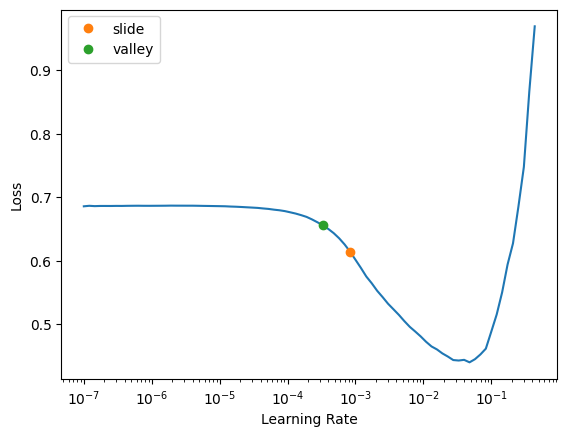

In [30]:
learner.lr_find(suggest_funcs=[slide, valley])

In [31]:
learner.fit_one_cycle(2,5.85e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.144876,0.142915,0.963083,00:53
1,0.143007,0.140985,0.963083,00:55


In [32]:
learner.save("game-classifier-stage-0")

Path('models/game-classifier-stage-0.pth')

In [33]:
learner.export("models/game-classifier-stage-0.pkl")

### Stage - 1

In [34]:
learner.unfreeze()

SuggestedLRs(slide=0.00363078061491251, valley=0.0002290867705596611)

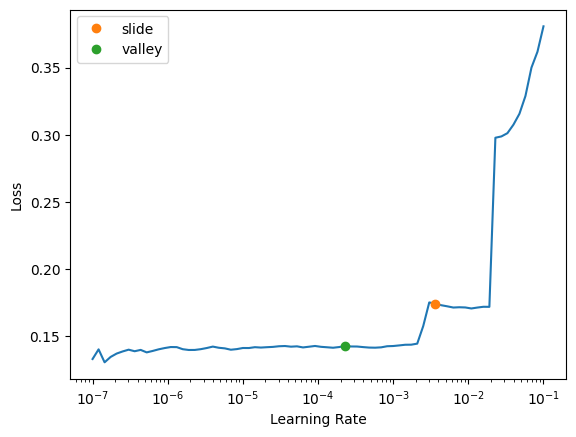

In [35]:
learner.lr_find(suggest_funcs=[slide, valley])

In [36]:
learner.fit_one_cycle(3,slice(2.15e-4, 3.75e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.146902,0.145940,0.943701,01:25
1,0.143198,0.141949,0.953814,01:27
2,0.142112,0.140963,0.963083,01:25


In [37]:
learner.save("game-classifier-stage-1")

Path('models/game-classifier-stage-1.pth')

In [38]:
learner.export("models/game-classifier-stage-1.pkl")